 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Welcome in this Notebook</p>

**The goal of these notebooks is to provide a set of tabular data that is fun and easy to access for anyone. These notebooks would be great for people looking for something for new learning**
**On this netbook, we will do some special analyzes in order to show the best results AND TRAIN THE MODEL FOR BEST ACCURACY. Welcome and let's start**

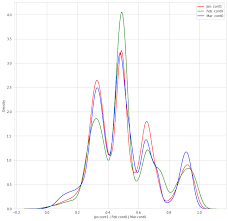

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns
from matplotlib import ticker
import missingno as no
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
# for train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss


In [2]:
train_df=pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
test_df=pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')
sample_submision=pd.read_csv('../input/tabular-playground-series-apr-2021/sample_submission.csv')


# read data by using head()

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


#### Showing information about data train


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
# describe data 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [6]:
# showing shape of data
train_df.shape

(100000, 12)

##### Check if there is blank data or not

In [7]:
train_df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [8]:
train_df['Sex'] = 1*(train_df['Sex'] == 'male')
test_df['Sex'] = 1*(test_df['Sex'] == 'male')

##### we can change the male and female to 0 for male and 1 for female

In [9]:
test_df['Age'].fillna((train_df['Age'].mean()), inplace=True)
train_df['Age'].fillna((train_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna((train_df['Fare'].mean()), inplace=True)
train_df['Fare'].fillna((train_df['Fare'].mean()), inplace=True)
test_df['SibSp'].fillna((train_df['SibSp'].mean()), inplace=True)
train_df['SibSp'].fillna((train_df['SibSp'].mean()), inplace=True)
test_df['Parch'].fillna((train_df['Parch'].mean()), inplace=True)
train_df['Parch'].fillna((train_df['Parch'].mean()), inplace=True)

In [10]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",1,38.355472,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",1,38.355472,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",1,0.330000,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",1,19.000000,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",1,25.000000,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",0,62.000000,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",1,66.000000,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",1,37.000000,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",1,51.000000,0,1,458654,30.92,NaN,S


####  we can cheak the Missing value for train

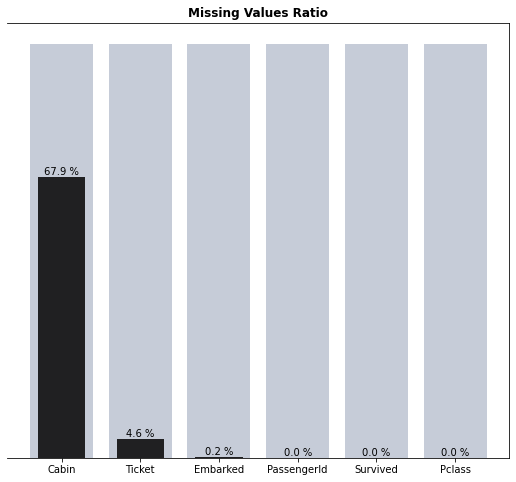

In [11]:
# this is colure use for plot
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_grey = "#c6ccd8"
primary_black = "#202022"
missing = (train_df.isna().sum().sort_values(ascending=False) / len(train_df) * 100)[:6]
fig, ax = plt.subplots(1,1,figsize=(9, 8))

ax.bar(missing.index, 100, color=primary_grey, width=0.8)

bar = ax.bar(missing.index, missing, color=primary_black, width=0.6)
ax.bar_label(bar, fmt='%.01f %%')
ax.spines.left.set_visible(False)
ax.set_yticks([])
ax.set_title('Missing Values Ratio', fontweight='bold')
plt.show()

### we can clean the massing value 

In [12]:
train_df.dropna(inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",1,38.355472,2,0,209245,27.14,C12239,S
8,8,0,1,"Wardlaw, Michael",1,27.000000,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",1,66.000000,0,0,6981,9.14,D2969,C
11,11,0,1,"Telschow, Robert",1,60.000000,0,0,19600,31.50,A9055,S
12,12,0,3,"Stewart, Pat",1,36.000000,0,0,434108,9.34,C8674,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99967,99967,0,1,"Harrier, Stacey",1,49.000000,2,0,402064,225.51,A4590,S
99989,99989,1,1,"Harris, Amy",0,64.000000,0,1,27728,31.66,D12975,C
99991,99991,0,1,"Hogan, Todd",1,53.000000,0,5,CA 48075,30.09,B19289,Q
99992,99992,1,2,"Cordero, Rita",0,58.000000,0,0,4451636,30.53,F12072,C


### cheak the missing value after the cleang

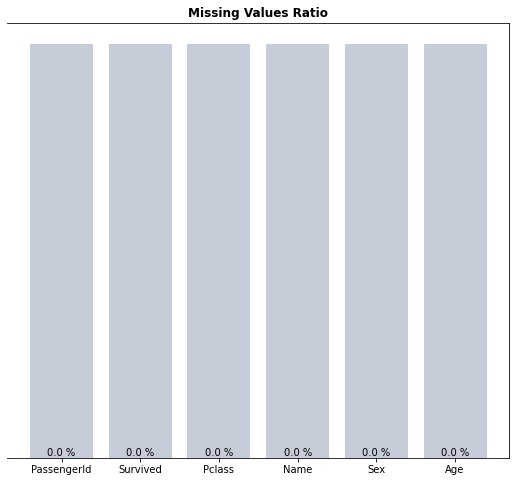

In [13]:
missing = (train_df.isna().sum().sort_values(ascending=False) / len(train_df) * 100)[:6]
fig, ax = plt.subplots(1,1,figsize=(9, 8))

ax.bar(missing.index, 100, color=primary_grey, width=0.8)

bar = ax.bar(missing.index, missing, color=primary_black, width=0.6)
ax.bar_label(bar, fmt='%.01f %%')
ax.spines.left.set_visible(False)
ax.set_yticks([])
ax.set_title('Missing Values Ratio', fontweight='bold')
plt.show()

<a id="3.1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Explor Data ana visualization</p>

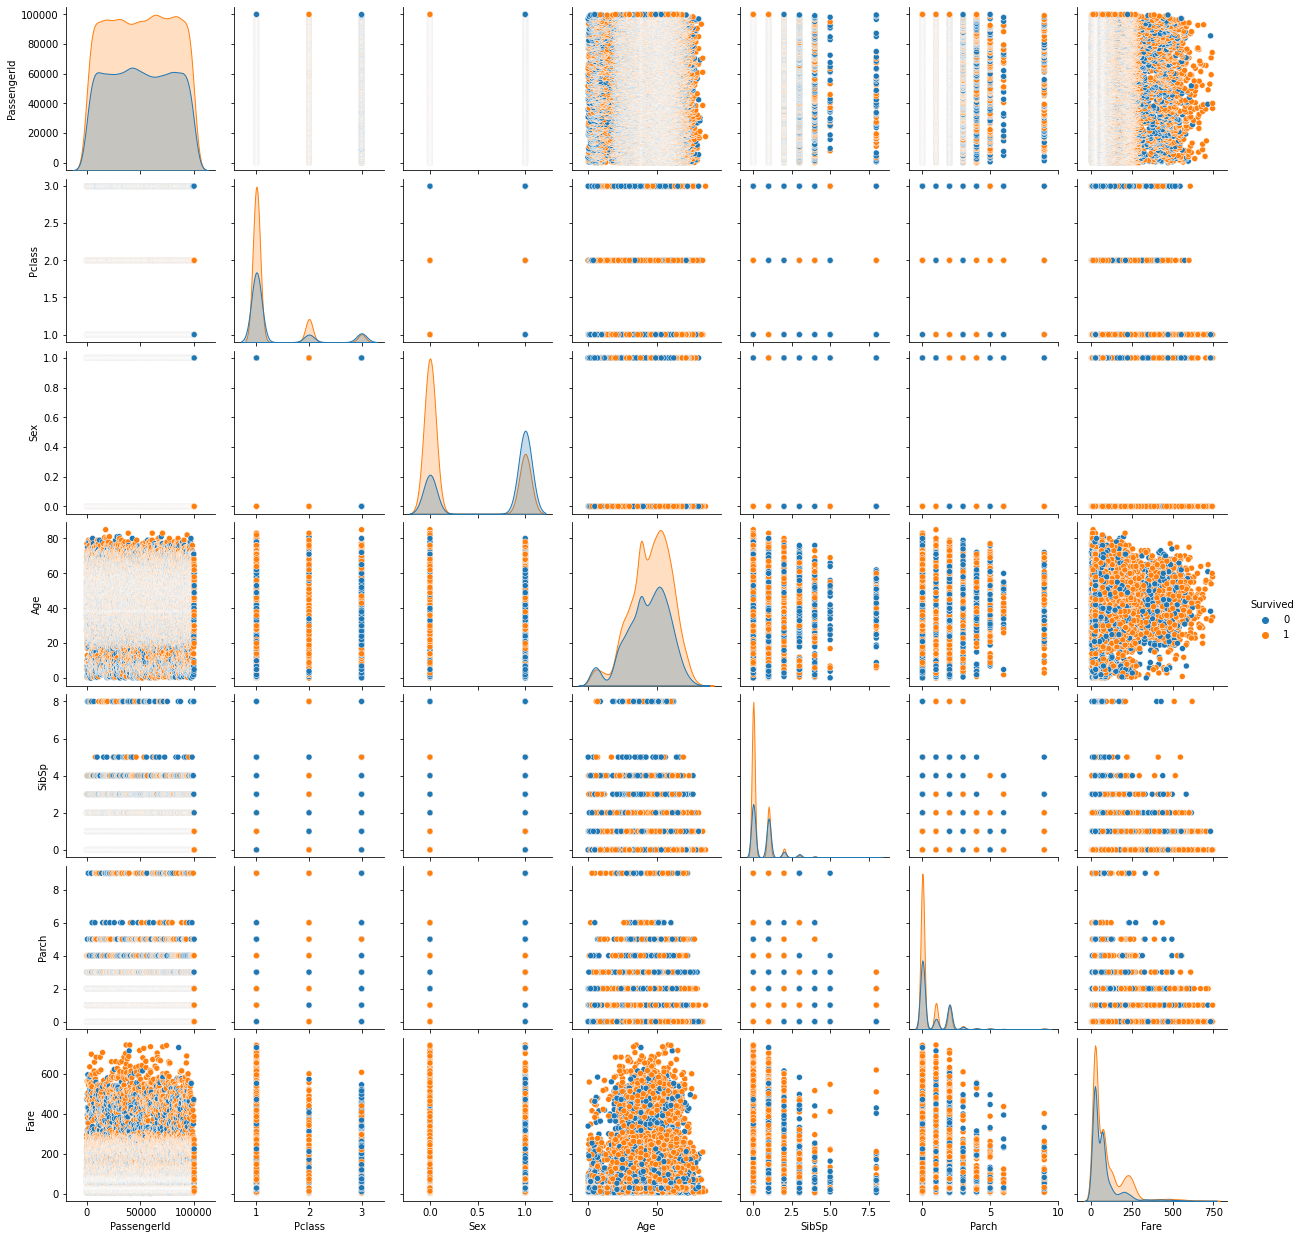

In [14]:
## so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')


# ploting columns Survived 
sns.pairplot(data=train_df, hue= "Survived")

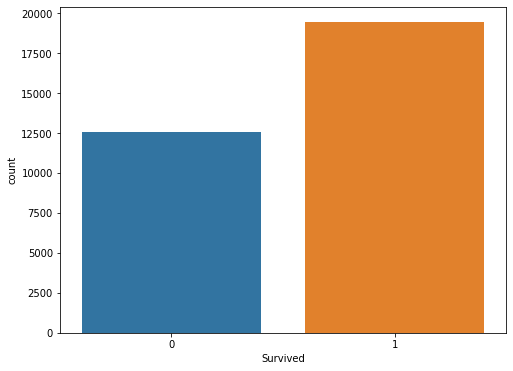

In [15]:
# using count ploting to show the number of died and live 
plt.figure(figsize=(8,6))
sns.countplot(train_df['Survived'])
plt.show()

<AxesSubplot:xlabel='Name'>

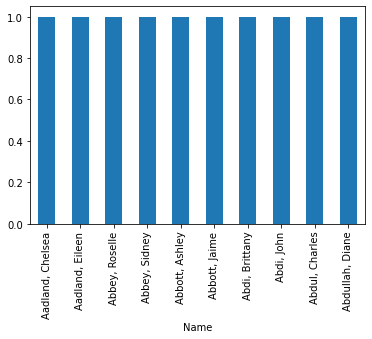

In [16]:
train_df.groupby('Name')['Survived'].max().nlargest(10).plot.bar()

#### Check the ferist data by name

In [17]:
trace1 = go.Bar( 
        x = train_df.groupby('Name')['Survived'].max().nlargest(100).index,
        y = train_df.groupby('Name')['Survived'].max().nlargest(100),
        name= 'Name')
iplot([trace1])

#### Here check the tail of number of name 

In [18]:
trace1 = go.Bar( 
        x = train_df.groupby('Name')['Survived'].max().tail(100).index,
        y = train_df.groupby('Name')['Survived'].max().tail(100),
        name= 'Name')
iplot([trace1])

Text(0.5, 1.0, 'Most Died ')

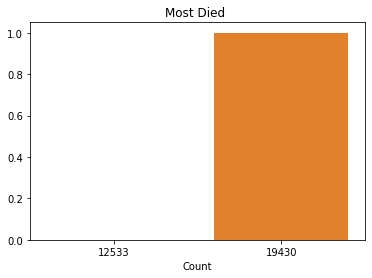

In [19]:

cuisines=train_df['Survived'].value_counts()[:100]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most Died ")

### Check the corr for data and use the heatmap to show this 

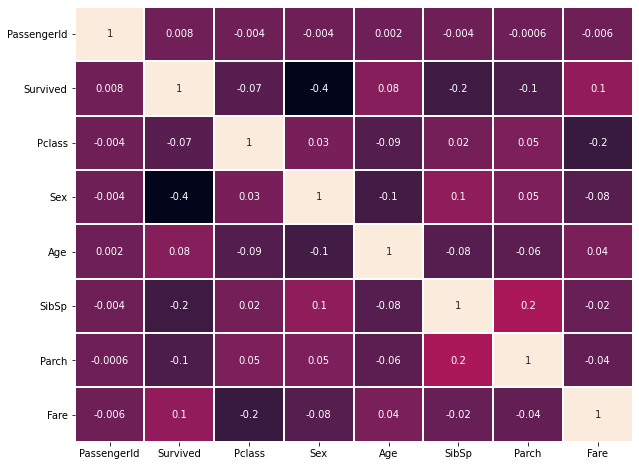

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cbar=False, fmt='.1g', linewidth=0.1);


<a id="3.1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Now we can check the model</p>

In [21]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",1,38.355472,2,0,209245,27.14,C12239,S
8,8,0,1,"Wardlaw, Michael",1,27.000000,2,1,474849,73.02,A7253,S


In [22]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### we can dorp the columns we don't interested for it


In [23]:
new_data=train_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Age','Fare'],axis=1)
new_data

,Survived,Pclass,Sex,SibSp,Parch
0,1,1,1,2,0
8,0,1,1,2,1
9,0,2,1,0,0
11,0,1,1,0,0
12,0,3,1,0,0
...,...,...,...,...,...
99967,0,1,1,2,0
99989,1,1,0,0,1
99991,0,1,1,0,5
99992,1,2,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(new_data)
print(scaler.mean_)

[0.60789037 1.24059068 0.4358477  0.4824641  0.5603041 ]


In [25]:
X = new_data.drop(['Survived'],axis=1)
y = new_data['Survived']


<a id="3.1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Train test split</p>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Using LogisticRegressionModel

In [27]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1,random_state=33,intercept_scaling=1)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1, random_state=33, solver='sag')

### Calculating Details

In [28]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))


LogisticRegressionModel Train Score is :  0.7039925286014476
LogisticRegressionModel Test Score is :  0.7058210087220326


In [29]:
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [20]


In [30]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print("*********************************************************")
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print("*********************************************************")

print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])


*********************************************************
Predicted Value for LogisticRegressionModel is :  [1 0 0 0 1 1 0 1 1 1]
*********************************************************
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.17496043 0.82503957]
 [0.77285317 0.22714683]
 [0.52831758 0.47168242]
 [0.72409174 0.27590826]
 [0.20116255 0.79883745]
 [0.17496043 0.82503957]
 [0.52831758 0.47168242]
 [0.29340175 0.70659825]
 [0.208311   0.791689  ]
 [0.208311   0.791689  ]]


In [31]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[2835 1294]
 [1809 4610]]


<AxesSubplot:>

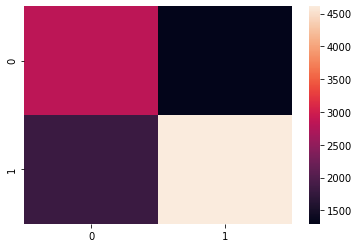

In [32]:
sns.heatmap(CM)

In [33]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.7058210087220326


### Making Linear Model

In [34]:
#making Linear Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
y_pred

array([0.83175223, 0.23774522, 0.46098041, ..., 0.83175223, 0.69936389,
       0.37440369])

In [35]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
#Calculating Prediction
y_pred = regressor.predict(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print("*********************************************************")

print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0.83175223 0.23774522 0.46098041 0.28908978 0.79652008 0.83175223
 0.46098041 0.69936389 0.78846387 0.78846387]
*********************************************************
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.17496043 0.82503957]
 [0.77285317 0.22714683]
 [0.52831758 0.47168242]
 [0.72409174 0.27590826]
 [0.20116255 0.79883745]
 [0.17496043 0.82503957]
 [0.52831758 0.47168242]
 [0.29340175 0.70659825]
 [0.208311   0.791689  ]
 [0.208311   0.791689  ]]


### Using KNN

In [37]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1000, metric = 'minkowski', p = 3)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1000, p=3)

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

[[2606 1523]
 [1688 4731]]


<AxesSubplot:>

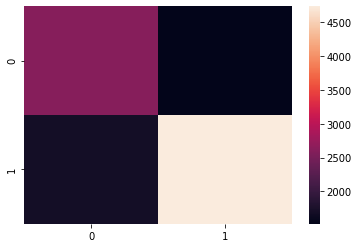

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm)

In [40]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.6955821008722033


#### Fitting Decision Tree Regression to the datase

In [41]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [42]:
# Predicting a new result
y_pred=regressor.predict(X_test)
y_pred

array([0.83684083, 0.15979381, 0.47873373, ..., 0.83684083, 0.77836412,
       0.1852552 ])

### Check model Evaluate

In [43]:
from sklearn.model_selection import cross_val_predict
models = [LogisticRegressionModel , regressor , classifier ]

In [44]:
x=0
for m in models:
    x+=1
    
    for n in range(2,5):
        print('result of model number : ' , x ,' for cv value ',n,' is \n' , cross_val_predict(m, X, y, cv=n))  
        print('-----------------------------------')
    print('=====================================')
    print('=====================================')


result of model number :  1  for cv value  2  is 
 [0 0 0 ... 0 1 1]
-----------------------------------
result of model number :  1  for cv value  3  is 
 [0 0 0 ... 0 1 1]
-----------------------------------
result of model number :  1  for cv value  4  is 
 [0 0 0 ... 0 1 1]
-----------------------------------
result of model number :  2  for cv value  2  is 
 [0.44767442 0.42857143 0.46712803 ... 0.42857143 0.909375   0.909375  ]
-----------------------------------
result of model number :  2  for cv value  3  is 
 [0.42561983 0.42857143 0.42337662 ... 0.53846154 0.90767386 0.90767386]
-----------------------------------
result of model number :  2  for cv value  4  is 
 [0.42696629 0.41025641 0.42227378 ... 0.5        0.90822785 0.90822785]
-----------------------------------
result of model number :  3  for cv value  2  is 
 [0 0 1 ... 0 1 1]
-----------------------------------
result of model number :  3  for cv value  3  is 
 [0 0 1 ... 0 1 1]
----------------------------------

<a id="4"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">END</p>